In [2]:
# EDA Exploratory Data Analysis
# Data Set 
# https://raw.githubusercontent.com/Pankaj-Str/Complete-Python-Mastery/refs/heads/main/00%20Examples/lecture08/Aug%2012%202025/StudentsPerformance.csv

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load the dataset 
data = pd.read_csv("students.csv")

In [5]:
# show dataset top 5
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# load last 5 row 
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
# check shap (row and column)
data.shape

(1000, 8)

In [8]:
# show column names 
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
# check summary statistics only int value
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# unique value 
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
# specific columns 
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [12]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [13]:
# Clean the data 
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
students = data.drop(['race/ethnicity','parental level of education'],axis=1)

In [15]:
students.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [17]:
# check scores (0-100) box plots IQR method - Outliers
Q1 = students['math score'].quantile(0.25)
Q3 = students['math score'].quantile(0.75)
IQR = Q3 - Q1
students = students[
    ~((students['math score']< (Q1 - 1.5 * IQR)) | 
      (students['math score']>(Q3 + 1.5 * IQR)) )
    ]

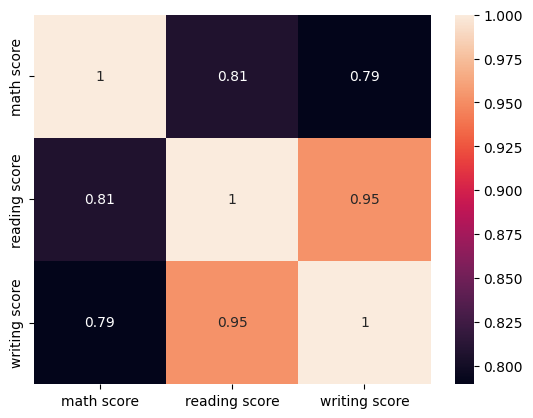

In [18]:
# relationships between variable
# matrix and heatmap
correlation = students.corr(numeric_only=True)
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)
plt.show()


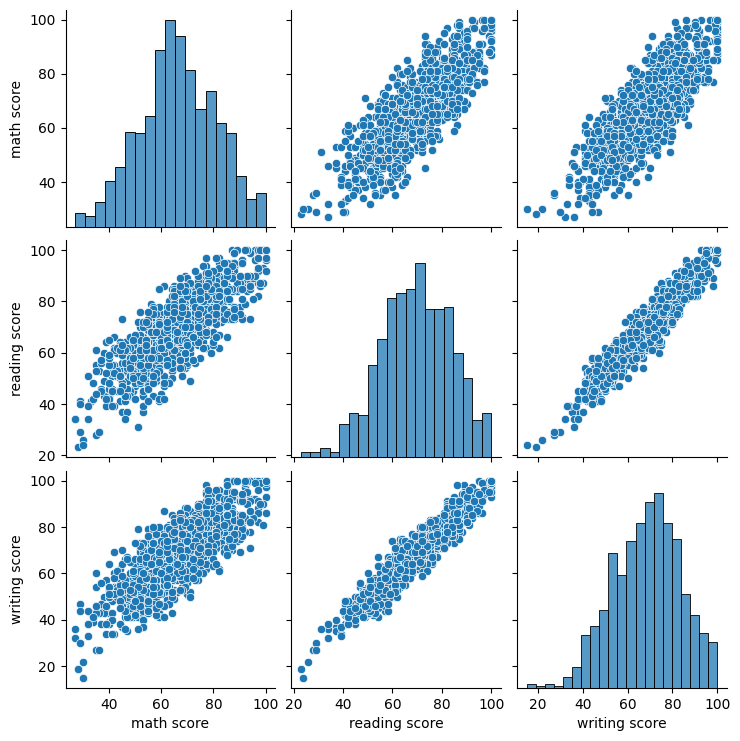

In [19]:
# pairplot visualize relationship 
sns.pairplot(students)
plt.show()

In [20]:
students.columns

Index(['gender', 'lunch', 'test preparation course', 'math score',
       'reading score', 'writing score'],
      dtype='object')

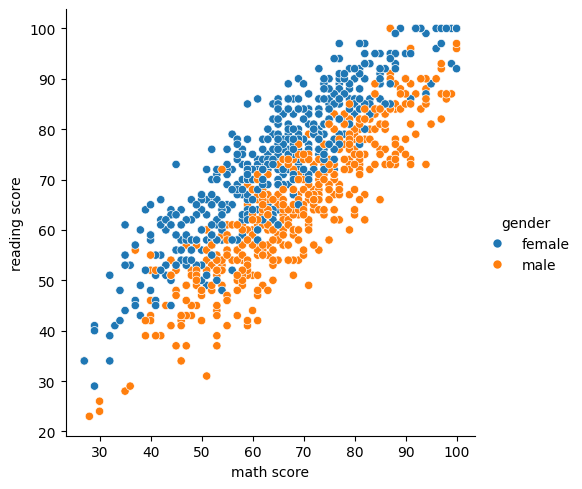

In [22]:
# scatterplot with hue (categories)
sns.relplot(x='math score',y='reading score',hue='gender',data=students)
plt.show()

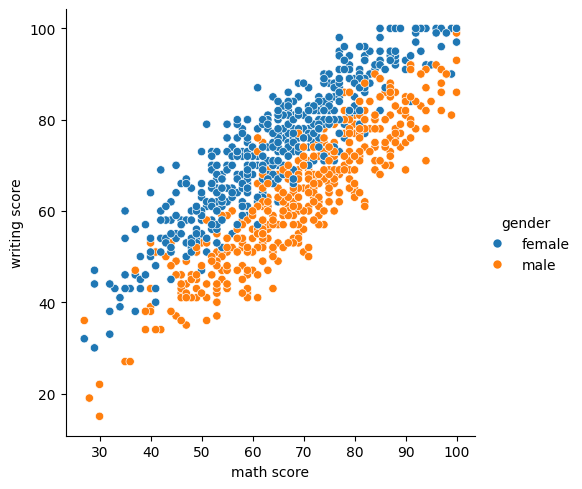

In [23]:
# scatterplot with hue (categories)
sns.relplot(x='math score',y='writing score',hue='gender',data=students)
plt.show()

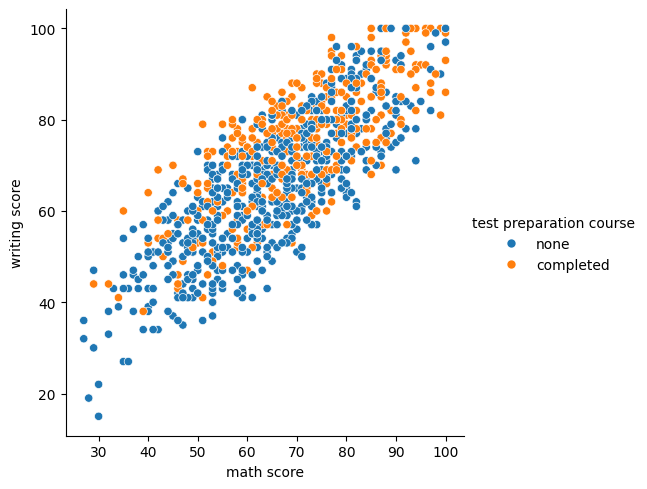

In [27]:
# scatterplot with hue (categories)
sns.relplot(x='math score',y='writing score',hue='test preparation course',data=students)
plt.show()

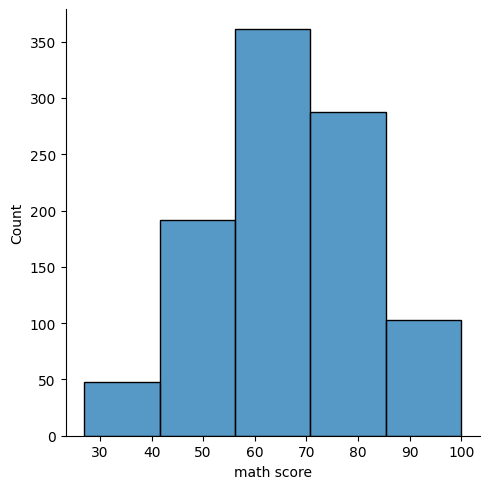

In [28]:
# Histogram
sns.displot(students['math score'],bins=5)
plt.show()

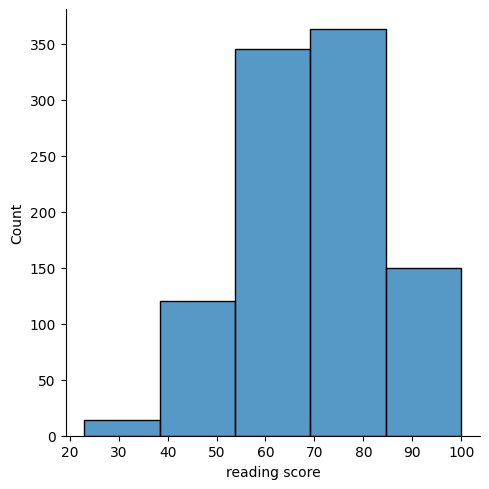

In [29]:
# Histogram
sns.displot(students['reading score'],bins=5)
plt.show()

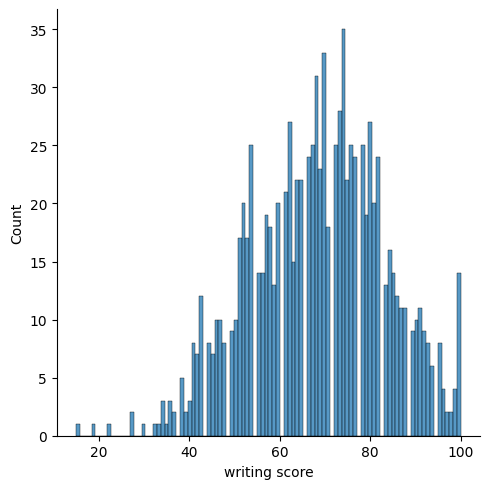

In [34]:
# Histogram
sns.displot(students['writing score'],bins=100)
plt.show()

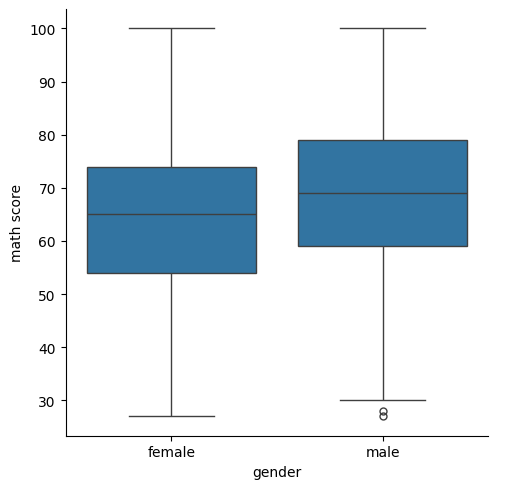

In [35]:
# box plot
sns.catplot(x='gender',y='math score', kind='box',data=students)
plt.show()

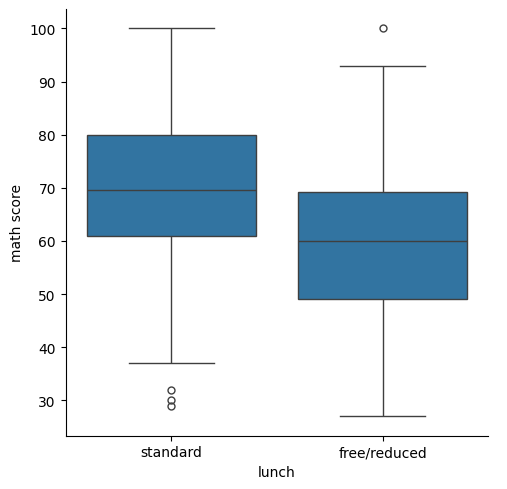

In [36]:
# box plot
sns.catplot(x='lunch',y='math score', kind='box',data=students)
plt.show()

In [37]:
students.columns

Index(['gender', 'lunch', 'test preparation course', 'math score',
       'reading score', 'writing score'],
      dtype='object')

In [42]:
students = pd.get_dummies(students,columns=['gender', 'lunch', 'test preparation course', 'math score',
       'reading score', 'writing score'])

KeyError: "None of [Index(['gender', 'lunch', 'test preparation course', 'math score',\n       'reading score', 'writing score'],\n      dtype='object')] are in the [columns]"

In [39]:
students.head()

,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score_27,math score_28,math score_29,math score_30,...,writing score_91,writing score_92,writing score_93,writing score_94,writing score_95,writing score_96,writing score_97,writing score_98,writing score_99,writing score_100
0,True,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
